In [1]:
# Heat transport and temperature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
Cp = 4220  # Specific heat content J/kg/C
rho = 1025 # Density
ny = 9
T0 = 9 # Initial temperature
Area = np.empty([50, 27])
Area[:10, :] = 100
Area[10:20, :] = 200
Area[20:30, :] = 300
Area[30:40, :] = 800
Area[40:, :] = 1600
ga = np.repeat(np.array([[.5],[1],[1.5],[4],[8]]),10) * 200 * ny # Grid area
#wei = np.repeat(np.array([[.5],[1],[1.5],[4],[8]]),10) / 15 # Weight coefficient for temperature calculation
wei = Area / (200*15)

state0 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/State700/Hs_010.nc')
tn = len(state0.T) # End day
state = state0.isel(Y=range(1,10), T=range(40,tn)) # Remove the boundary walls in y direction
Time = state.T.data
pt = state.Temp.data.mean(2) # T, Z, X
u = state.U.data.mean(2)
w = state.W.data.mean(2)
np.shape(state.Temp.data)

(81, 50, 9, 50)

In [21]:
Hnet = np.empty(len(Time))
pt_mean = np.empty(len(Time))
for t in range(len(Time)):
    pt_v = pt[t,:,2:29]
    Hnet[t] = -np.sum(u[t,:,29]*ga*(pt_v[:,-1])) + np.sum(u[t,:,2]*ga*(pt_v[:,0]))
    pp = pt_v * wei
    masked = np.ma.masked_equal(pp, 0)
    pt_mean[t] = pp[pp!=0].mean()
    pt_xmean = np.empty(pt_v.shape[1])
    mm = np.empty(pt_v.shape[1])
    #for xl in range(27):
        #pt_x = pt_v[:,xl] * wei
        
        #masked = np.ma.masked_equal(pt_v[:,xl], 0)*wei
        #mm[xl] = masked.mean()
        #pt_xmean[xl] = np.true_divide(pt_x.sum(),(pt_x!=0).sum()) # Non-zero mean
    #pt_mean[t] = mm.mean()

Text(0, 0.5, 'Temperature (°C)')

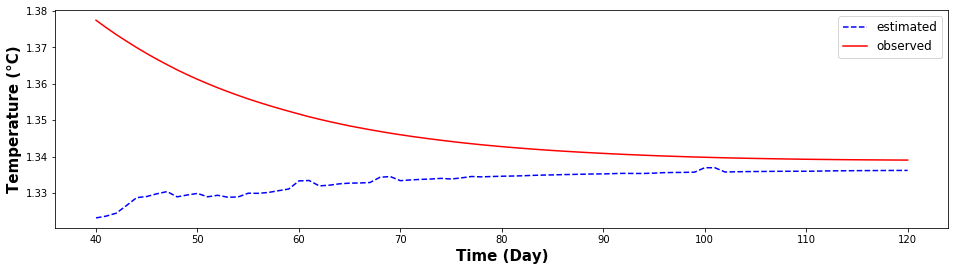

In [42]:
pvol = pt.mean(0)[:,2:29]
pvol[pvol != 0] = 1
vmask = np.ma.masked_equal(pvol, 0)
Vol = np.sum(vmask * Area * 200 ) * ny # Control volume


dt = Time[1]-Time[0] # Time step
pt_pre = np.empty(len(Time))
pt_pre[0] = Hnet[0]*dt/Vol
for j in range(1,len(Time)):
    pt_pre[j] = Hnet[j-1:j+1].mean()*dt/Vol

fig, ax = plt.subplots(figsize=(16,4)) 
plt.plot(Time/dt, pt_pre, 'b--', lw=1.5, label='estimated')
plt.plot(Time/dt, pt_mean, 'r-', lw=1.5, label='observed')
plt.legend(loc='best', fontsize=12)
#ax.set_xlim([0,120])
#ax.set_xticks(np.linspace(0,120,13))
#ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 15)
#plt.title('$H_s = $'+str(Hs)+' $m,Q_f = $'+str(Qf)+' $m^3/s$', size=20)
plt.xlabel("Time (Day)", size=15, weight = 'bold')
plt.ylabel("Temperature (\N{DEGREE SIGN}C)", size=15, weight = 'bold')

In [ ]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Transport/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig.savefig(fig_path + '/EquationH'+str(Hs)+'.png', dpi = 150, bbox_inches='tight')

In [40]:
Vol

1341360000.0

In [34]:
dt

43200.0